# Titanic Survival Data Analysis

## Introduction

The jupyter notebook is developed to perform basic data analysis for titanic survival data.

The main question that we want to study is which factors are important in passenger survivals.

First of all, we load in the csv data file.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


titanic_data = pd.read_csv('/Users/januschou/Documents/Intro-to-Programming-Udacity/data-analysis/titanic_data.csv')

The dataset contains 891 observations and 12 columns. But we have missing values in Age, Cabin and Embarked, which can be reflected in the following summary.

In [2]:
# rough look of the first few rows of the dataset

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# observations counts for each column.

titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Here, we simply drop the missing values when performing analysis. If there are too many missings, the relevant calculation or analysis would turn out to be invalid since we only look at a small proportion of the data. For example, if we want look at Cabin column, this idea will not work nicely. However, since we are intended to work on it, we decide to drop the missing values accordingly to keep the work simple.

Also, we convert some columns with string values into categories to perform related analysis by groups.

In [4]:
# convert related columns into categorical data

titanic_data['Survived'] = titanic_data['Survived'].astype('category')
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')
titanic_data['Embarked'] = titanic_data['Embarked'].astype('category')

## Data Visualization

We are about to perform some visualizations for the Titanic Survival Data. We first start from distribution of the survived passangers.

0    549
1    342
Name: Survived, dtype: int64


[<matplotlib.text.Text at 0x10e90ae90>, <matplotlib.text.Text at 0x109786fd0>]

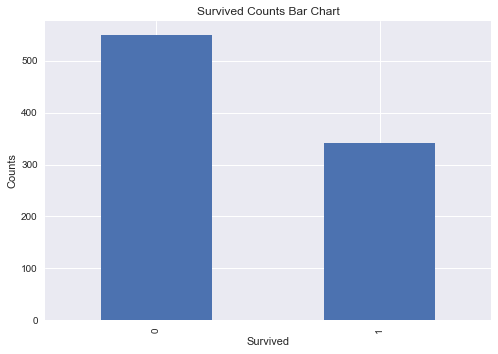

In [5]:
# Survived vs Dead passengers. 0 means dead, 1 means survived.
print titanic_data.Survived.value_counts()

titanic_data.Survived.value_counts().plot(kind='bar', \
                                          title = 'Survived Counts Bar Chart').set(xlabel='Survived',\
                                                                                   ylabel='Counts')


As the bar chart shows above, among all the passengers, 549 of them were dead while 342 were alive. Next, we will do a rough check about other numerical columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


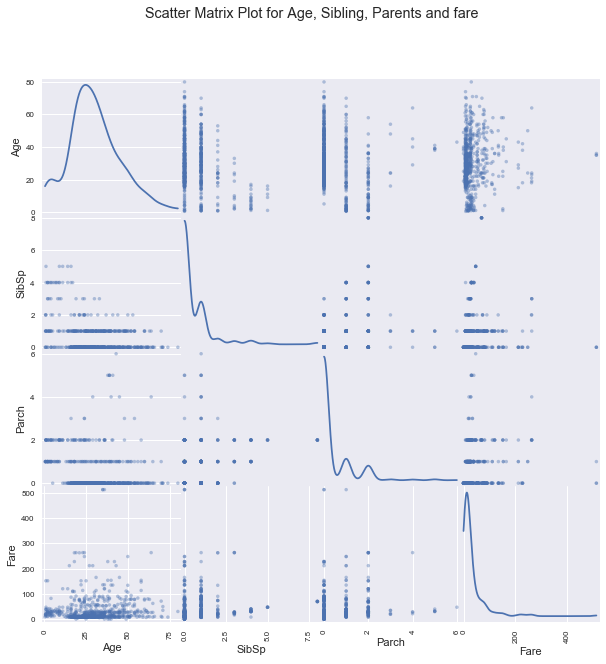

In [6]:
# import pandas plotting module

from pandas.plotting import scatter_matrix

print titanic_data.columns

# extract numrical columns
titanic_corr_df = titanic_data[titanic_data.columns[[5, 6, 7, 9]]]

scatter_matrix(titanic_corr_df, alpha=0.4, figsize=(10, 10), diagonal='kde')

plt.suptitle('Scatter Matrix Plot for Age, Sibling, Parents and fare')

plt.show()

According to the pairwise scatterpolt, we can see that the majority of passengers' ages are around 20-40. Most of them did not travel with siblings or only with one. Similarly, this also applys to parents. Lastly, most people took on board with farily low cost for the tickets.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


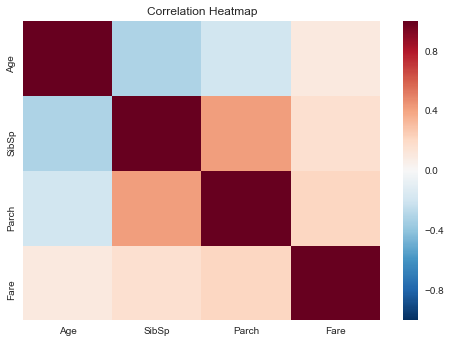

In [7]:
# calculation about correlations
corr = titanic_corr_df.corr()

print corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


sns.plt.title('Correlation Heatmap')

We can see that the number of siblings and parents are moderately positively correlated, but age and the number of siblings are somewhat negatively correlated instead.

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


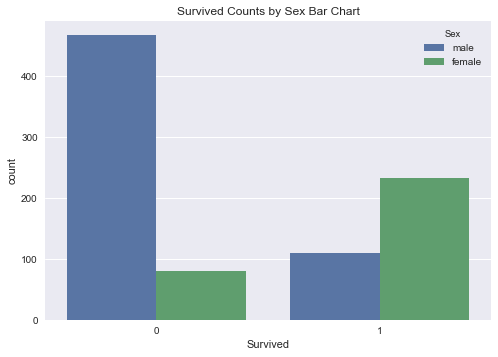

In [8]:
# Survival bar chart by sex. 
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

print titanic_data.groupby(['Survived', 'Sex'])['Sex'].count()

sns.plt.title('Survived Counts by Sex Bar Chart')

It is obvious that women have more survives than men. Men only have 18.9% survival rate, while women have survival rate 74.2%. Here, we can say that gender would one of the important factor for peple who survive.

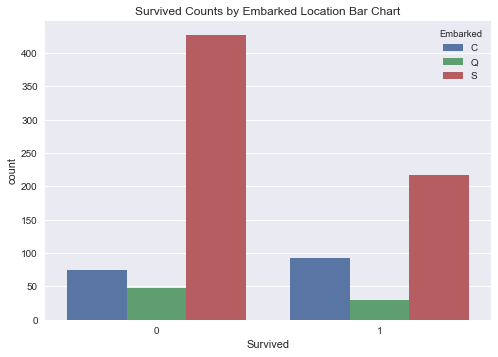

In [9]:
# Bar Chart showing the rough relation between departure locations and if a person survived.

sns.countplot(x="Survived", hue="Embarked", data=titanic_data)

sns.plt.title('Survived Counts by Embarked Location Bar Chart')

Only people got on board in Cherbourg would be more likely to survive on Titanic. As for others, the majority died.

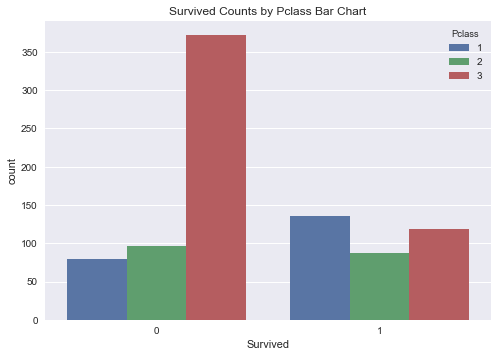

In [10]:
# Class level vs Survivals

sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

sns.plt.title('Survived Counts by Pclass Bar Chart')

It is easy for us to see that the people with higher class tickets they are more likely to survive, since most of the people in Class 3 died; people in second class have more or less equal probablity of survival and people who traveled as first class have more survivals in their own group. 

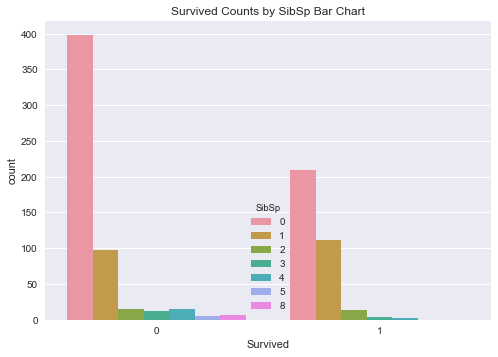

In [11]:
# Siblings and spouse vs Survivals

sns.countplot(x="Survived", hue="SibSp", data=titanic_data)

sns.plt.title('Survived Counts by SibSp Bar Chart')

People who traveled by their own (without siblings or spouse) or the number is greater than 2 would have higher death rate. Other categories have roughly equal possibility of survival.

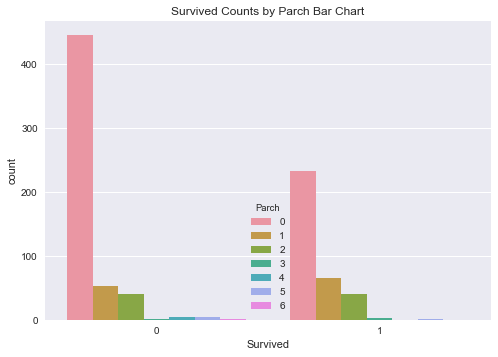

In [12]:
# Parents and children vs Survivals

sns.countplot(x="Survived", hue="Parch", data=titanic_data)

sns.plt.title('Survived Counts by Parch Bar Chart')

People who traveled by their own (without children or parents) would have higher death rate. Other categories have roughly equal possibility of survival.

          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


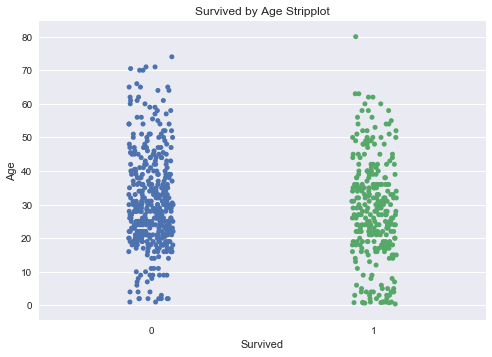

In [13]:
# stripplot of survived by age
sns.stripplot(x="Survived", y="Age", data=titanic_data, jitter=True)

print titanic_data.groupby(['Survived'])['Age'].describe()

sns.plt.title('Survived by Age Stripplot')

Based on the quick summary across the two groups, younger people may have higher possibility to survive. However, since there are age overlappings across the two groups, age might not be a strong signal for survival.

          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


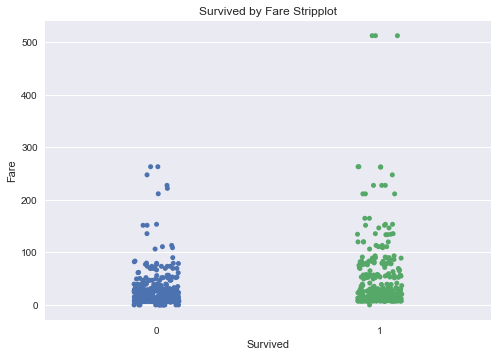

In [14]:
# stripplot of survived by age

sns.stripplot(x="Survived", y="Fare", data=titanic_data, jitter=True)

print titanic_data.groupby(['Survived'])['Fare'].describe()

sns.plt.title('Survived by Fare Stripplot')

Without performing seirous statistical test, we can tend to believe that people paid more for the ticket would have higher probability of survival. 

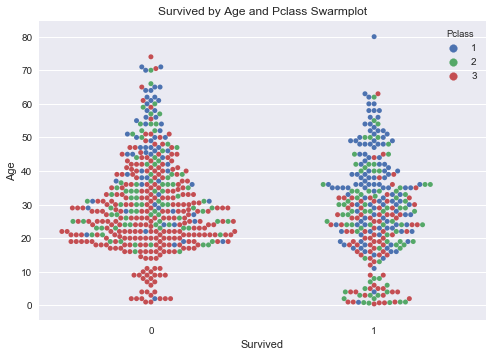

In [15]:
# Swarmplot 

sns.swarmplot(x="Survived", y="Age", hue="Pclass", data=titanic_data)

sns.plt.title('Survived by Age and Pclass Swarmplot')

People who got cheap class are likely to die and they are younger comparing to people in other classes. For Class 2, the age distribution are roughly the same but the kids with age less than 10 all survived in the group. As for the people in first class, most of them were elder people and they have significant higher survival rates comparing to the other 2 groups.

## Preliminary conclusions



Based on the basic analysis we performed above, we can roughly say that gender would be a significant factor since women are more likely to survive. In addition, people from Cherbourg have higher survival rate comparing to people from Queenstown and Southampton. Moreover, higher class and ticket fare might also indicate a survival.

To sum up, the gender, starting location, class and fare would be obvious significant factors in this context. However, we cannot say other factors are completely not contributing to survivals, they are just not that signigicant by our observations. To reach a solid conclusions, we need to perform serious statistical tests in the future steps.